# Homework 1, Problem 2: Series

In [1]:
def exp(x, n):
    sum = 1
    term = 1
    for i in range(1, n+1):
        term = term*x/i
        sum += term
    return sum

In [2]:
def exp_adjusted(x, n):
    if x < 0:
        return 1 / exp(-1*x, n)
    return exp(x, n)


In [3]:
import numpy as np
x = list(range(0, 101))

exp20numpy = np.exp(20)
expnn20numpy = np.exp(-20)
expx = {
    "exp(20) original": [exp(20, n) for n in x],
    "exp(-20) original": [exp(-20, n) for n in x],
    "exp(-20) adjusted": [exp_adjusted(-20, n) for n in x]
}

def err(numpy, series):
    return abs(numpy - series) / numpy
def err_list(numpy, series_list):
    return [err(numpy, series) for series in series_list]

y = {
    "exp(20) original": err_list(exp20numpy, expx["exp(20) original"]),
    "exp(-20) original": err_list(expnn20numpy, expx["exp(-20) original"]),
    "exp(-20) adjusted": err_list(expnn20numpy, expx["exp(-20) adjusted"])
}

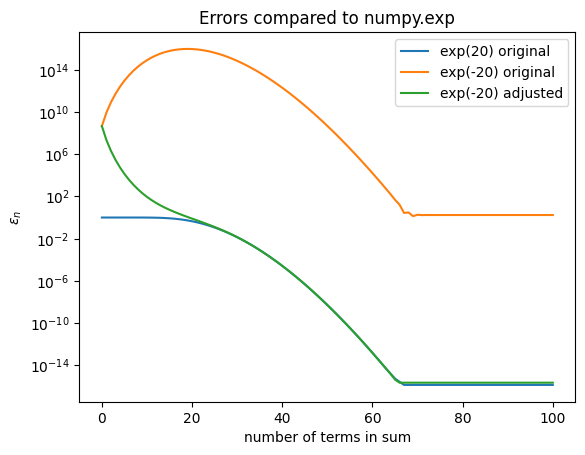

In [4]:
import matplotlib.pyplot as plt

for label, ys in y.items():
    plt.plot(x, ys, label=label)

plt.title("Errors compared to numpy.exp")
plt.xlabel("number of terms in sum")
plt.ylabel(r"$\epsilon_n$")
plt.legend()
# not plotted as log on the x-axis because I think that obscures the pattern
plt.yscale("log")
plt.show()

The $e^{-20}$ approximation begins with a lot more error than the $e^{20}$ approximation. Approximating a large number monotonically from below is capped at 100% error, whereas approximating a small number from above has no cap on its error, and thus can start at 100,000,000,000% error, like we see here.

While every term in the series for $e^{20}$ is positive, the $e^{-20}$ series alternates positive and negative terms. As a result, the sum fluctuates around the target value and causes large errors. Some the large negative and large positive terms appear to nearly cancel and cause roundoff errors that persist even after the series converges. The adjusted version of the $e^{-20}$ series remains positive throughout, smoothing the errors due to the sum. This is hard to determine solely from the error chart, so the following graph displays the estimated value as a function of number of terms in the sum for each case.

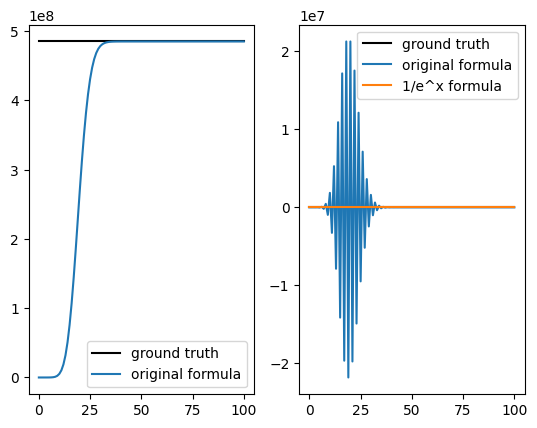

In [5]:
fig, axes = plt.subplots(1, 2)

axes[0].plot(x, [exp20numpy]*len(x), c="black", label="ground truth")
axes[0].plot(x, expx["exp(20) original"], label="original formula")
axes[0].legend()

axes[1].plot(x, [expnn20numpy]*len(x), c="black", label="ground truth")
axes[1].plot(x, expx["exp(-20) original"], label="original formula")
axes[1].plot(x, expx["exp(-20) adjusted"], label="1/e^x formula")
axes[1].legend()

plt.show()